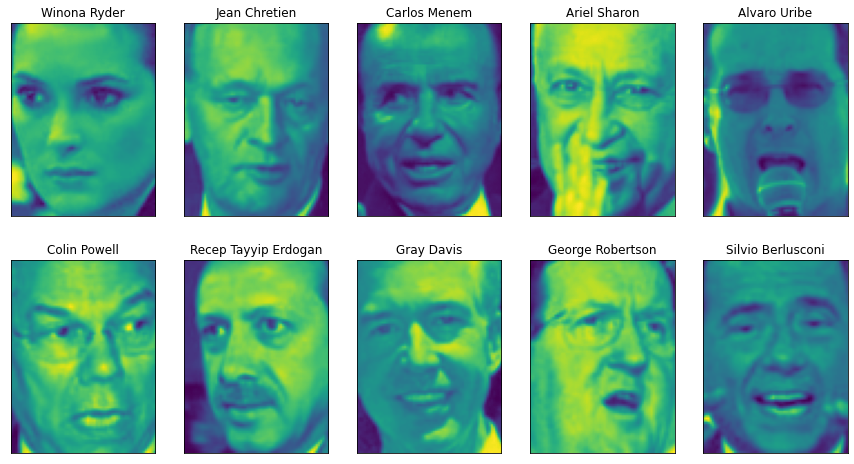

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (),  'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [2]:
print("People.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

People.images.shape: (3023, 87, 65)
Number of classes: 62


In [3]:
# Counting how often each target appears

import numpy as np
counts = np.bincount(people.target)

# Printing count next to the target names

for i, (count, name) in enumerate(zip(counts, people.target_names)):
  print("{0:25} {1:3}".format(name, count), end = " ")
  if (i + 1) % 3 == 0:
    print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

##### As you can see the dataset is skewed because it has many pictures of George W. Bush and Colin Powell so to remove this skewness we will only take up to 50 images of each person. 

##### Other wise the feature extraction will be overwhelmed with the images of George W. Bush

In [4]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
  mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# Scaling the Greyscale Values to be between 0 and 1 instead of 0 and 255 for better numeric capability
X_people = X_people / 255

### K - Nearest Neigbors Classifier

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

# Building the KNeighborsClassifier using 1 neighbor

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.23


##### As you can see our test set accuracy is less than 25% which is great if we had guessed it randomly we would have got 1.5% (1/62) accuracy but it is not so great as well.

##### Therefore we use PCA. 

In [6]:
!pip install mglearn

In [7]:
import mglearn

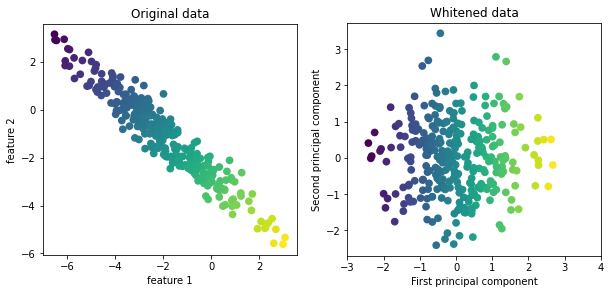

In [8]:
mglearn.plots.plot_pca_whitening()

In [9]:
# We fit the PCA object on the training data and extract the first 100 principal components. Then we transform the training and testing data.

from sklearn.decomposition import PCA

pca = PCA(n_components=100, whiten=True, random_state = 0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca shape: {}".format(X_train_pca.shape))

X_train_pca shape: (1547, 100)


In [10]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.31


In [11]:
print("PCA Component's Shape: {}".format(pca.components_.shape))

PCA Component's Shape: (100, 5655)


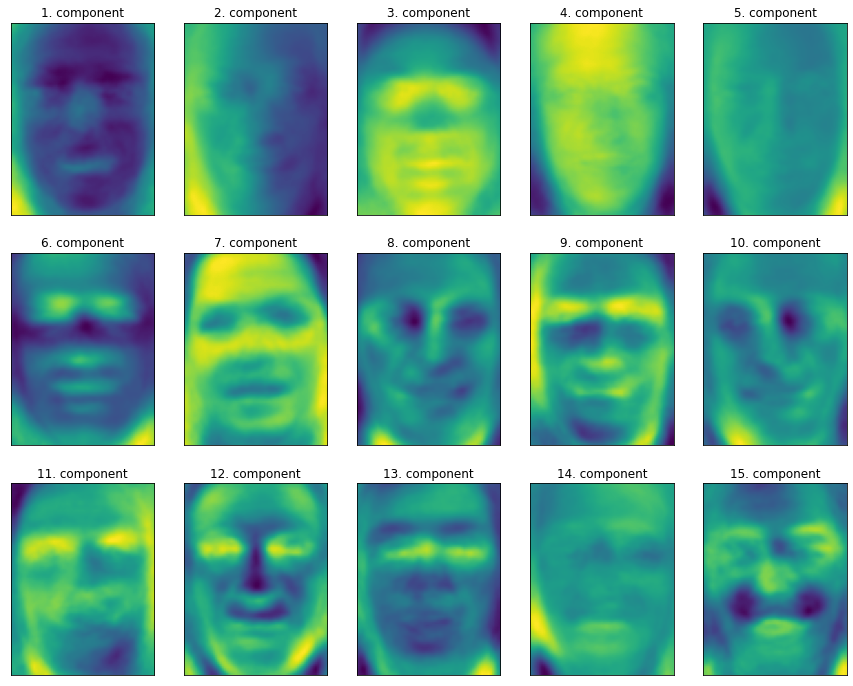

In [ ]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
  ax.imshow(component.reshape(image_shape), cmap='viridis')
  ax.set_title("{}. component".format((i + 1)))

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 5.3s, 0.1min


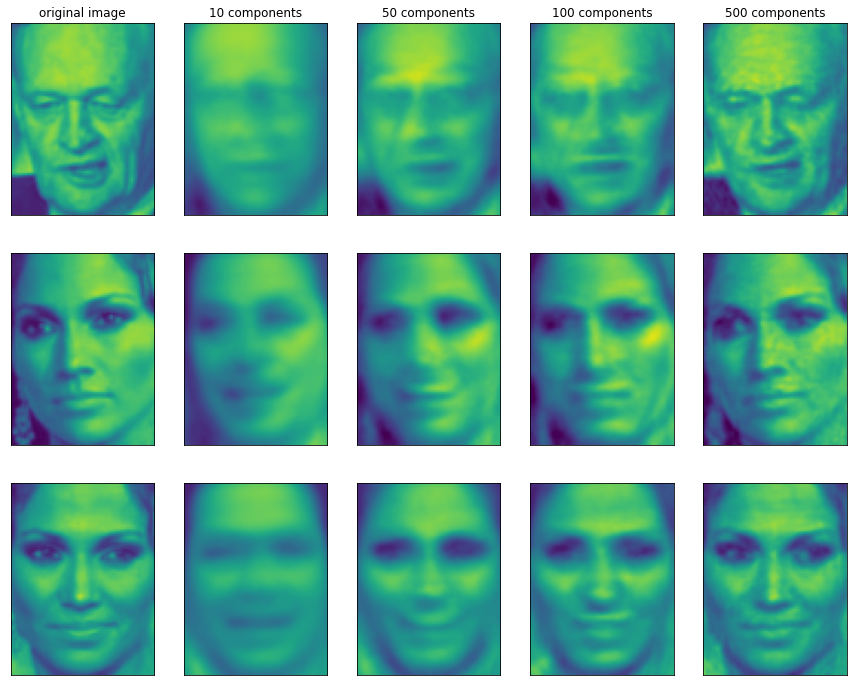

In [13]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, 'Second Principal Component')

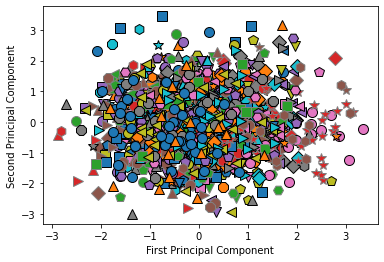

In [14]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")